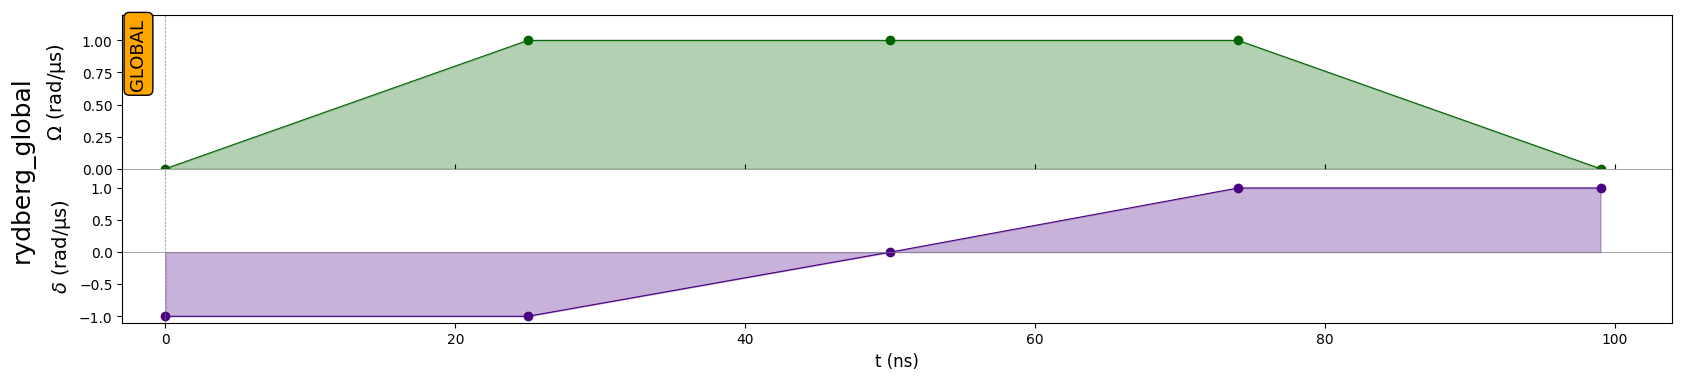

0.6

In [6]:
import numpy as np
import pulser
from pulser.waveforms import *

def coordinate_to_pulser(amp_values, det_values, time_step, duration):
    device = pulser.AnalogDevice
    register = pulser.Register.from_coordinates([(0, 0)], prefix="q")

    sequence = pulser.Sequence(register, device)
    sequence.declare_channel("rydberg_global", "rydberg_global")

    pi_pulse = pulser.Pulse(amplitude=InterpolatedWaveform(duration=duration, values=amp_values, times=time_step, interpolator="interp1d"), detuning=InterpolatedWaveform(duration=duration, values=det_values, times=time_step, interpolator="interp1d"), phase=0)

    sequence.add(pi_pulse, "rydberg_global")
    sequence.draw(mode="input")

    return pi_pulse

def pulse_to_coordinate(pulse):
    amp = pulse.amplitude.data_points.T # amp[0] = amp_x, amp[1] = amp_y
    det = pulse.detuning.data_points.T # det[0] = det_x, det[1] = det_y

    return amp, det

def linear_interpolation(x_list, y_list, x_query):
    if x_query < x_list[0] or x_query > x_list[-1]:
        raise ValueError("Range Error")
    
    for i in range(len(x_list) - 1):
        if x_list[i] <= x_query <= x_list[i + 1]:
            # 선형 보간 공식: y = y1 + (x - x1) * (y2 - y1) / (x2 - x1)
            x1, x2 = x_list[i], x_list[i + 1]
            y1, y2 = y_list[i], y_list[i + 1]
            return y1 + (x_query - x1) * (y2 - y1) / (x2 - x1)
    
    return None  # 이 코드는 실행되지 않을 가능성이 높음 (범위 체크했기 때문)

pulse = coordinate_to_pulser([0, 1, 1, 1, 0], [-1, -1, 0, 1, 1], [0, 0.25, 0.5, 0.75, 1], 100)

amp, det = pulse_to_coordinate(pulse)

linear_interpolation(amp[0], amp[1], 15)